In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
def generate_data(number_of_samples=100, margin=0.5, seed=21):
    number_of_samples_per_class = number_of_samples //2

    rng = np.random.default_rng(seed=seed)

    x1 = (rng.random(number_of_samples_per_class) * 2 - 1) / 2 - margin
    y1 = (rng.random(number_of_samples_per_class) * 2 - 1) / 2 + margin

    x2 = (rng.random(number_of_samples_per_class) * 2 - 1) / 2 + margin
    y2 = (rng.random(number_of_samples_per_class) * 2 - 1) / 2 - margin
    
    X1 = np.column_stack((x1, y1))
    X2 = np.column_stack((x2, y2))
    X = np.vstack((X1, X2))
    y = np.hstack((np.ones(shape=number_of_samples_per_class), -np.ones(shape=number_of_samples_per_class)))

    data = np.empty((number_of_samples_per_class*2, 4))
    data[:, 0] = np.ones(shape=data.shape[0])
    data[:, 1] = X[:, 0]
    data[:, 2] = X[:, 1]
    data[:, 3] = y


    return data

def generate_data2(m, margin):
    from sklearn.datasets import make_blobs
    X, y = make_blobs(
        n_samples=m, centers=2, n_features=2, center_box=(0, 10), random_state=21908859
    )

    y[y == 0] = -1

    data = np.empty(shape=(m, 4))
    data[:, 0] = 1
    data[:, (1, 2)] = X
    data[:, 3] = y

    return data

In [4]:
def accuracy(y, predictions):
    return np.sum(y == predictions) / y.size

In [5]:
class SimplePerceptron:
    def __init__(self, training_rate=0.1, max_number_of_iterations=100, seed=None):
        self.training_rate = training_rate
        self.max_number_of_iterations = max_number_of_iterations
        self.weights = None
        self.number_of_steps = None

        if seed is not None:
            self.rng = np.random.default_rng(seed=seed)
        else:
            self.rng = np.random.default_rng()



    def fit(self, X, y):
        if set(np.unique(y)) != {-1, 1}:
            raise ValueError("Class labels in y must be -1 or 1.")

        self.weights = np.zeros(shape=X.shape[1])
        self.number_of_steps = 0

        for i in range(self.max_number_of_iterations):
            predictions = np.sign(np.dot(X, self.weights))
            misclassified = (y != predictions)
            misclassified_indices = np.flatnonzero(misclassified)

            if misclassified_indices.size == 0:
                break
            

            random_misclassified_index = self.rng.choice(misclassified_indices)
            self.weights = self.weights + self.training_rate * y[random_misclassified_index] * X[random_misclassified_index]
            self.number_of_steps += 1

        return self.weights, self.number_of_steps
    
    def decision_function(self, X):
        return np.sign(np.dot(X, self.weights))
    
    def predict(self, X):
        predictions = self.decision_function(X)
        return predictions


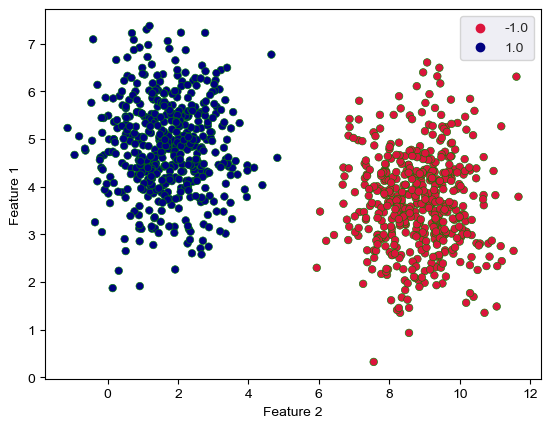

In [6]:
number_of_samples = 1000
margin = 0.5 # min 0.5

# data = generate_data(number_of_samples=number_of_samples, margin=margin, seed=21)
data = generate_data2(number_of_samples, margin)

plt.ylabel('Feature 1')
plt.xlabel('Feature 2')
sns.set_style('darkgrid')
sns.scatterplot(x=data[:, 1], y=data[:, 2], hue=data[:, 3], palette=['Crimson', 'Navy'], edgecolor='g', s=30);

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data[:, 0:3], data[:, -1], test_size=0.2, random_state=212121)

perceptron = SimplePerceptron(training_rate=0.01, max_number_of_iterations=10000, seed=21)
weights, number_of_steps = perceptron.fit(X_train, y_train)

print(f'Number of steps: {number_of_steps}\n'
      f'Weights: {weights}')




Number of steps: 17
Weights: [ 0.05       -0.14889449  0.1617332 ]


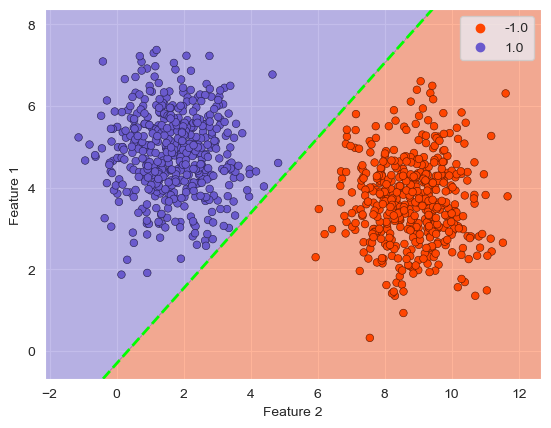

In [8]:
plt.ylabel('Feature 1')
plt.xlabel('Feature 2')
sns.set_style('darkgrid')
sns.scatterplot(x=data[:, 1], y=data[:, 2], hue=data[:, 3], palette=['orangered', 'slateblue'], edgecolor='k', s=30);

w0, w1, w2 = weights
X = data[:, 1:3]
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
decision_boundary = w0 + w1 * xx1 + w2 * xx2
plt.contour(xx1, xx2, decision_boundary, levels=[0], linewidths=2, colors='lime', linestyles='dashed');
plt.contourf(xx1, xx2, decision_boundary, levels=[-np.inf, 0, np.inf], colors=['orangered', 'slateblue'], alpha=0.4);

    # xx1, xx2: Dwuwymiarowe tablice numpy stworzone za pomocą np.meshgrid, reprezentujące siatkę punktów w przestrzeni cech.
    # decision_boundary: Wartości decyzji dla każdego punktu na siatce. Jest to wyrażenie matematyczne granicy decyzyjnej perceptronu, tj. w0+w1⋅x1+w2⋅x2w0​+w1​⋅x1​+w2​⋅x2​.
    # levels: Poziomy, na których rysowane są kontury. W tym przypadku chcemy, aby kontur był rysowany dokładnie na poziomie 0, co odpowiada granicy decyzyjnej perceptronu.
    # linewidths: Grubość linii konturu.
    # colors: Kolor konturu, w tym przypadku czerwony.

In [9]:
predictions = perceptron.predict(X_test)

_accuracy = accuracy(y_test, predictions)
print(f'Accuracy: {_accuracy}')

Accuracy: 1.0


test

Number of steps: 7
Weights: [-0.01       -0.01645491  0.01966921]
Accuracy: 1.0


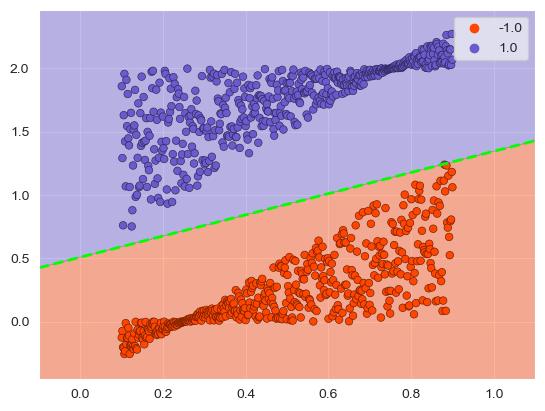

In [12]:
# x1 = np.linspace(0.1, 0.9, 100)

# margin = 0.01
# line_func = lambda x: 2*x - margin / 2
# line_func2 = lambda x: 2*x + margin / 2


# y1 = np.random.uniform(0, line_func(x1), 100)
# y2 = np.random.uniform(line_func2(x1), 2, 100)
# y2 = y2

# plt.plot(x1, line_func(x1), 'r')
# plt.plot(x1, line_func2(x1), 'r')
# plt.scatter(x1, y1)
# plt.scatter(x1, y2)

def generate_data_test(number_of_points, margin):
    number_of_points //= 2
    x = np.linspace(0.1, 0.9, number_of_points)
    line1 = lambda x: 2*x - margin / 2
    line2 = lambda x: 2*x + margin / 2

    y1 = np.random.uniform(0, line1(x), number_of_points)
    y2 = np.random.uniform(line2(x), 2, number_of_points)

    X0 = np.ones(shape=number_of_points * 2)
    X1 = np.concatenate((x, x))
    X2 = np.concatenate((y1, y2))
    X = np.column_stack((X0, X1, X2))

    y = np.concatenate((-np.ones(shape=number_of_points), +np.ones(shape=number_of_points)))

    data = np.column_stack((X, y))

    return data

data = generate_data_test(1000, 0.5)
sns.scatterplot(x=data[:, 1], y=data[:, 2], hue=data[:, 3], palette=['orangered', 'slateblue'], edgecolor='k', s=30);

X_train, X_test, y_train, y_test = train_test_split(data[:, 0:3], data[:, -1], test_size=0.2, random_state=212121)
perc = SimplePerceptron(training_rate=0.01, max_number_of_iterations=10000, seed=21)
weights, number_of_steps = perc.fit(X_train, y_train)

print(f'Number of steps: {number_of_steps}\n'
        f'Weights: {weights}')

w0, w1, w2 = weights
X = data[:, 1:3]
x1_min, x1_max = X[:, 0].min() -0.2 , X[:, 0].max() + 0.2
x2_min, x2_max = X[:, 1].min() -0.2, X[:, 1].max() + 0.2
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
decision_boundary = w0 + w1 * xx1 + w2 * xx2
plt.contour(xx1, xx2, decision_boundary, levels=[0], linewidths=2, colors='lime', linestyles='dashed');
plt.contourf(xx1, xx2, decision_boundary, levels=[-np.inf, 0, np.inf], colors=['orangered', 'slateblue'], alpha=0.4);

predictions = perc.predict(X_test)

_accuracy = accuracy(y_test, predictions)
print(f'Accuracy: {_accuracy}')


In [37]:
number_of_points_values = [500, 1000, 1500]
training_rate_values = [0.001, 0.01, 0.1]
margin_values = [0.1, 0.5, 1.0]

results_df = pd.DataFrame(columns=['Number_of_Points', 'Training_Rate', 'Margin', 'Number_of_Steps'])

for n_points in number_of_points_values:
    for rate in training_rate_values:
        for m in margin_values:
            # Tworzenie nowych danych
            data = generate_data_test(n_points, m)
            X_train, X_test, y_train, y_test = train_test_split(data[:, 0:3], data[:, -1], test_size=0.2, random_state=212121)

            # Uczenie perceptronu
            perc = SimplePerceptron(training_rate=rate, max_number_of_iterations=10000, seed=21)
            weights, number_of_steps = perc.fit(X_train, y_train)

            # Dodanie wyników do ramki danych
            results_df = pd.concat([results_df, pd.DataFrame({'Number_of_Points': [n_points],
                                                              'Training_Rate': [rate],
                                                              'Margin': [m],
                                                              'Number_of_Steps': [number_of_steps]})],
                                   ignore_index=True)

# Wyświetlenie ramki danych
# results_df = results_df.reset_index(drop=True)
            results_df = results_df.sort_values(by=['Number_of_Steps', 'Training_Rate', 'Margin'])
print(results_df.to_string(index=False))

Number_of_Points  Training_Rate  Margin Number_of_Steps
             500          0.100     1.0               5
             500          0.001     1.0               7
            1000          0.010     1.0               7
            1000          0.001     1.0              14
            1500          0.100     1.0              15
            1500          0.001     1.0              20
            1500          0.010     1.0              20
            1000          0.100     1.0              20
             500          0.010     1.0              22
             500          0.100     0.5              23
            1500          0.010     0.5              25
             500          0.001     0.5              29
            1500          0.001     0.5              29
            1000          0.100     0.5              35
            1500          0.100     0.5              35
            1000          0.001     0.5              39
            1000          0.010     0.5         